# step 1 import lib & data

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'/Users/tayen/Documents/CF/Instacart Basket Analysis'

In [3]:
ords_prods_cstm = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','ords_prods_cstm.pickle'))

In [4]:
ords_prods_merge = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','df_order_prods_labels.pickle'))

# step 2 chart

### bar charts

In [ ]:
ords_prods_merge.head()

In [ ]:
ords_prods_merge['order_dow'].value_counts().plot.bar()

In [ ]:
bar = ords_prods_merge['order_dow'].value_counts().sort_index().plot.bar(color = ['green','green','blue','blue','blue','blue','blue'])

### export plots

In [ ]:
bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_orders_dow.png'))

### histograms & scatterplots

In [ ]:
ords_prods_merge['prices'].plot.hist(bins = 25)

In [ ]:
sns.scatterplot(x = 'prices',y = 'prices',data = ords_prods_merge)

In [ ]:
# check for outliers
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

In [ ]:
# treat outliers as missing
ords_prods_merge.loc[ords_prods_merge['prices'] > 100,'prices'] = np.nan

In [ ]:
ords_prods_merge['prices'].max()

In [ ]:
# histogram
hist = ords_prods_merge['prices'].plot.hist(bins = 25)

In [ ]:
hist1 = ords_prods_merge['prices'].plot.hist(bins = 50)

In [ ]:
hist.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','hist_prices_bin25.png'))

In [ ]:
hist.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','hist_prices_bi50.png'))

### line chart

In [ ]:
# sampling data
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [ ]:
big = ords_prods_merge[dev]

In [ ]:
small = ords_prods_merge[~dev]

In [ ]:
len(ords_prods_merge)

In [ ]:
len(big) + len(small)

In [ ]:
linechart = small[['order_dow','prices']]

In [ ]:
line = sns.lineplot(data = linechart, x = 'order_dow', y = 'prices')

In [ ]:
line2 = ords_prods_merge[['order_dow','prices']]

# step 3 hours of the day histogram 

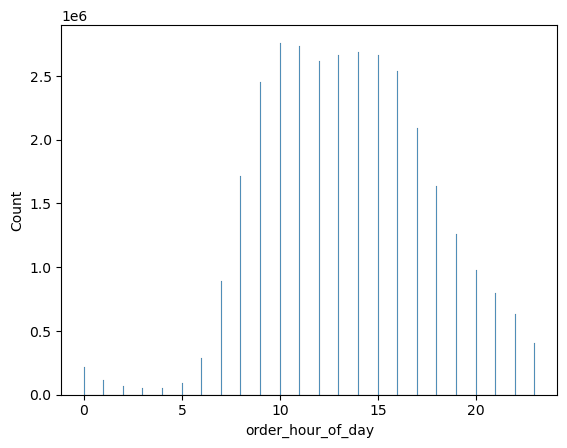

In [21]:
hist_hod = sns.histplot(data = ords_prods_cstm['order_hour_of_day'],element='bars')

In [7]:
ords_prods_cstm['order_hour_of_day'].value_counts()

10    2761760
11    2736140
14    2689136
15    2662144
13    2660954
12    2618532
16    2535202
9     2454203
17    2087654
8     1718118
18    1636502
19    1258305
20     976156
7      891054
21     795637
22     634225
23     402316
6      290493
0      218769
1      115700
5       87961
2       69375
4       53242
3       51281
Name: order_hour_of_day, dtype: int64

### orders surges at 7 am, peaks bettwen 9 - 16, then plummets around 24 

# step 4 loyalty bar chart

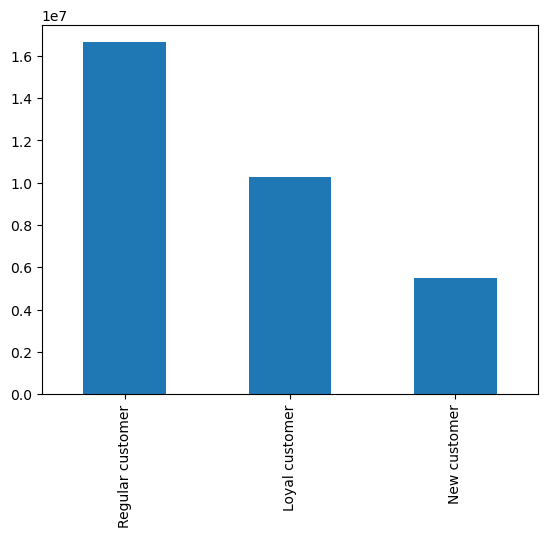

In [15]:
bar_loyalty = ords_prods_cstm['user_loyalty'].value_counts().plot.bar()

# step 5 expenditure on hod

In [9]:
# sample data
np.random.seed(3)
dev = np.random.rand(len(ords_prods_cstm)) <= 0.7

In [10]:
bigsample = ords_prods_cstm[dev]

In [11]:
smallsample = ords_prods_cstm[~dev]

In [12]:
smallsample.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,spending_range,user_frequency,gender,state,age,date_joined,n_dependants,fam_status,income,name
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Low spender,Non-frequent customers,Female,Alabama,31,2/17/2019,3,married,40423,Linda Nguyen
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Low spender,Non-frequent customers,Female,Alabama,31,2/17/2019,3,married,40423,Linda Nguyen
5,3367565,1,6,2,7,19.0,196,1,1,Soda,...,Low spender,Non-frequent customers,Female,Alabama,31,2/17/2019,3,married,40423,Linda Nguyen
25,2398795,1,2,3,7,15.0,10258,2,0,Pistachios,...,Low spender,Non-frequent customers,Female,Alabama,31,2/17/2019,3,married,40423,Linda Nguyen
29,3367565,1,6,2,7,19.0,10258,3,1,Pistachios,...,Low spender,Non-frequent customers,Female,Alabama,31,2/17/2019,3,married,40423,Linda Nguyen


In [13]:
ords_prods_cstm.shape

(32404859, 27)

In [14]:
len(bigsample) + len(smallsample)

32404859

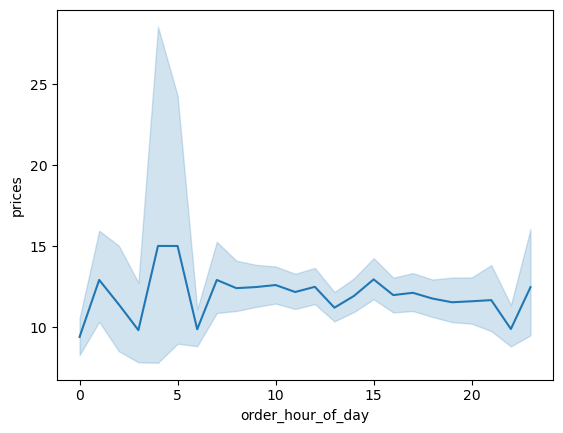

In [16]:
line_hod_prices = sns.lineplot(data = smallsample[['order_hour_of_day','prices']], x = 'order_hour_of_day',y = 'prices')

# step 6 age & dependant

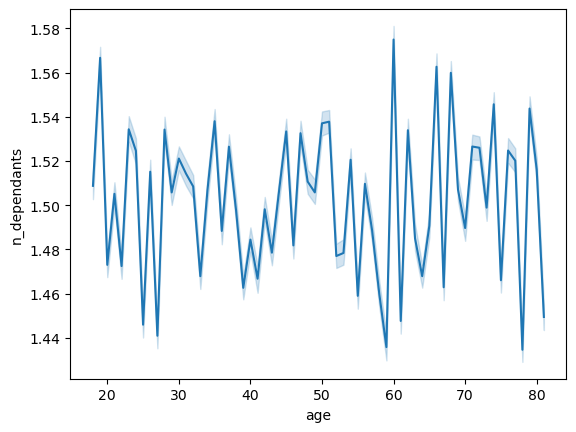

In [18]:
line_age_depedants = sns.lineplot(data = smallsample[['age','n_dependants']], x = 'age', y = 'n_dependants')

### no significant difference of dependants numbers has been found among ages 

# step 7 age & income

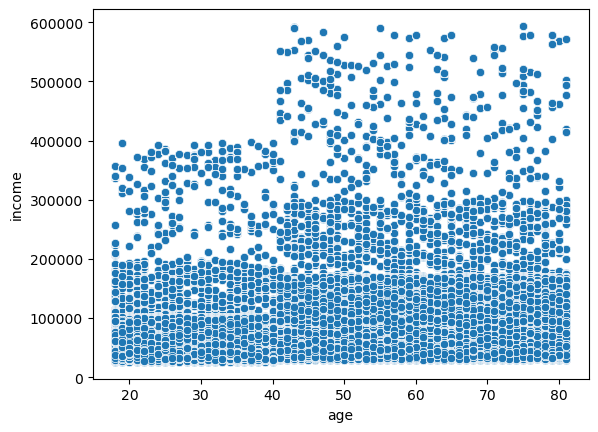

In [20]:
scatter_age_income = sns.scatterplot(data = smallsample[['age','income']],x = 'age',y = 'income')

### customers fall into higher income range ( income above 400000 ) are all over 40

# step 8 export viz

In [22]:
hist_hod.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','hist_hod.png'))

In [23]:
bar_loyalty.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_loyalty.png'))

In [24]:
line_hod_prices.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','line_hod_prices.png'))

In [27]:
line_age_depedants.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','line_age_depedants.png'))

In [28]:
scatter_age_income.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','scatter_age_income.png'))